In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Importing Breast_Cancerdataset Csv file using pandas

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

In [4]:
df.head()    #checking first 5 rows from Breast_Cancer dataset

Age   Race Marital Status T Stage N Stage 6th Stage  \
0   68  White        Married      T1      N1       IIA   
1   50  White        Married      T2      N2      IIIA   
2   58  White       Divorced      T3      N3      IIIC   
3   58  White        Married      T1      N1       IIA   
4   47  White        Married      T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [5]:
df.tail()    #checking last 5 rows from Breast_Cancer dataset

Age   Race Marital Status T Stage N Stage 6th Stage  \
4019   62  Other        Married      T1      N1       IIA   
4020   56  White       Divorced      T2      N2      IIIA   
4021   68  White        Married      T2      N1       IIB   
4022   58  Black       Divorced      T2      N1       IIB   
4023   46  White        Married      T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive

In [6]:
print('No of Rows:',df.shape[0])    #checking how many rows are in Breast_Cancer dataset
print('No of Columns:',df.shape[1])   #checking how many columns are in Breast_Cancer dataset

No of Rows: 4024
No of Columns: 16


In [7]:
df.describe()  #checking Discription of Breast_Cancer dataset (only numerical data) 

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [8]:
df.info()   #checking information of Breast_Cancer dataset (Columns, Non-Nulls, Counts, and DataType) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [9]:
df.columns   #checking which columns are in Breast_Cancer dataset

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [10]:
Numeric=['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status']   #filltering numeric data column in Numeric obj

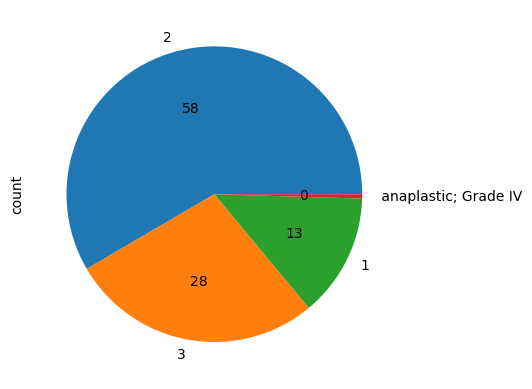

In [11]:
df['Grade'].value_counts().plot(kind='pie',autopct='%.f')   #checking value counts of Grade in pie chart
plt.show()

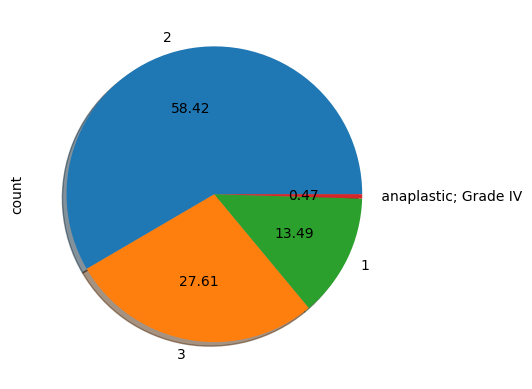

In [12]:
df['Grade'].value_counts().plot(kind='pie',autopct='%2.2f', shadow=True)
plt.show()

## filltering Categorycal data column in Category obj and print them one by one

In [13]:
Category=['Race','Marital Status','T Stage','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)


Race
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64
Marital Status
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
T Stage
T Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64
N Stage
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64
6th Stage
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
differentiate
differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
Grade
Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64
A Stage
A Stage
Regional    3932
Distant       92
Name: count, dtype: int64
Estrogen Status
Estrogen Status
Positive    3755
Negative     269
Name: count, d

<Figure size 1200x1000 with 0 Axes>

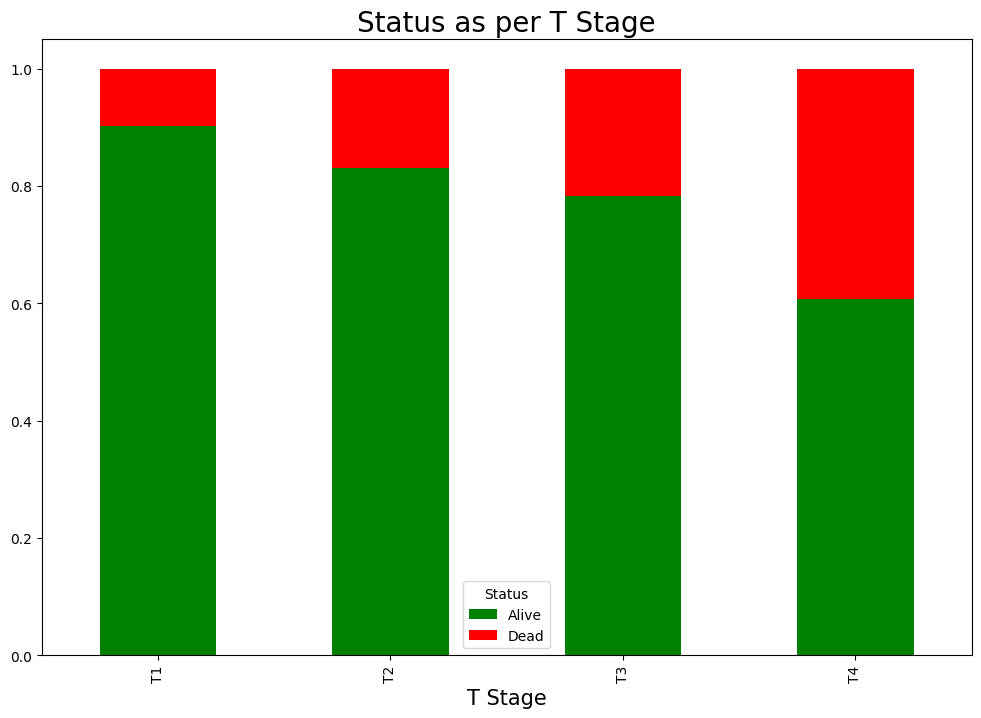

In [14]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['T Stage'], df['Status'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                    color=['green', 'red'],figsize=(12,8))
plt.title('Status as per T Stage', fontsize=20)
plt.xlabel('T Stage',fontsize=15)
plt.show()

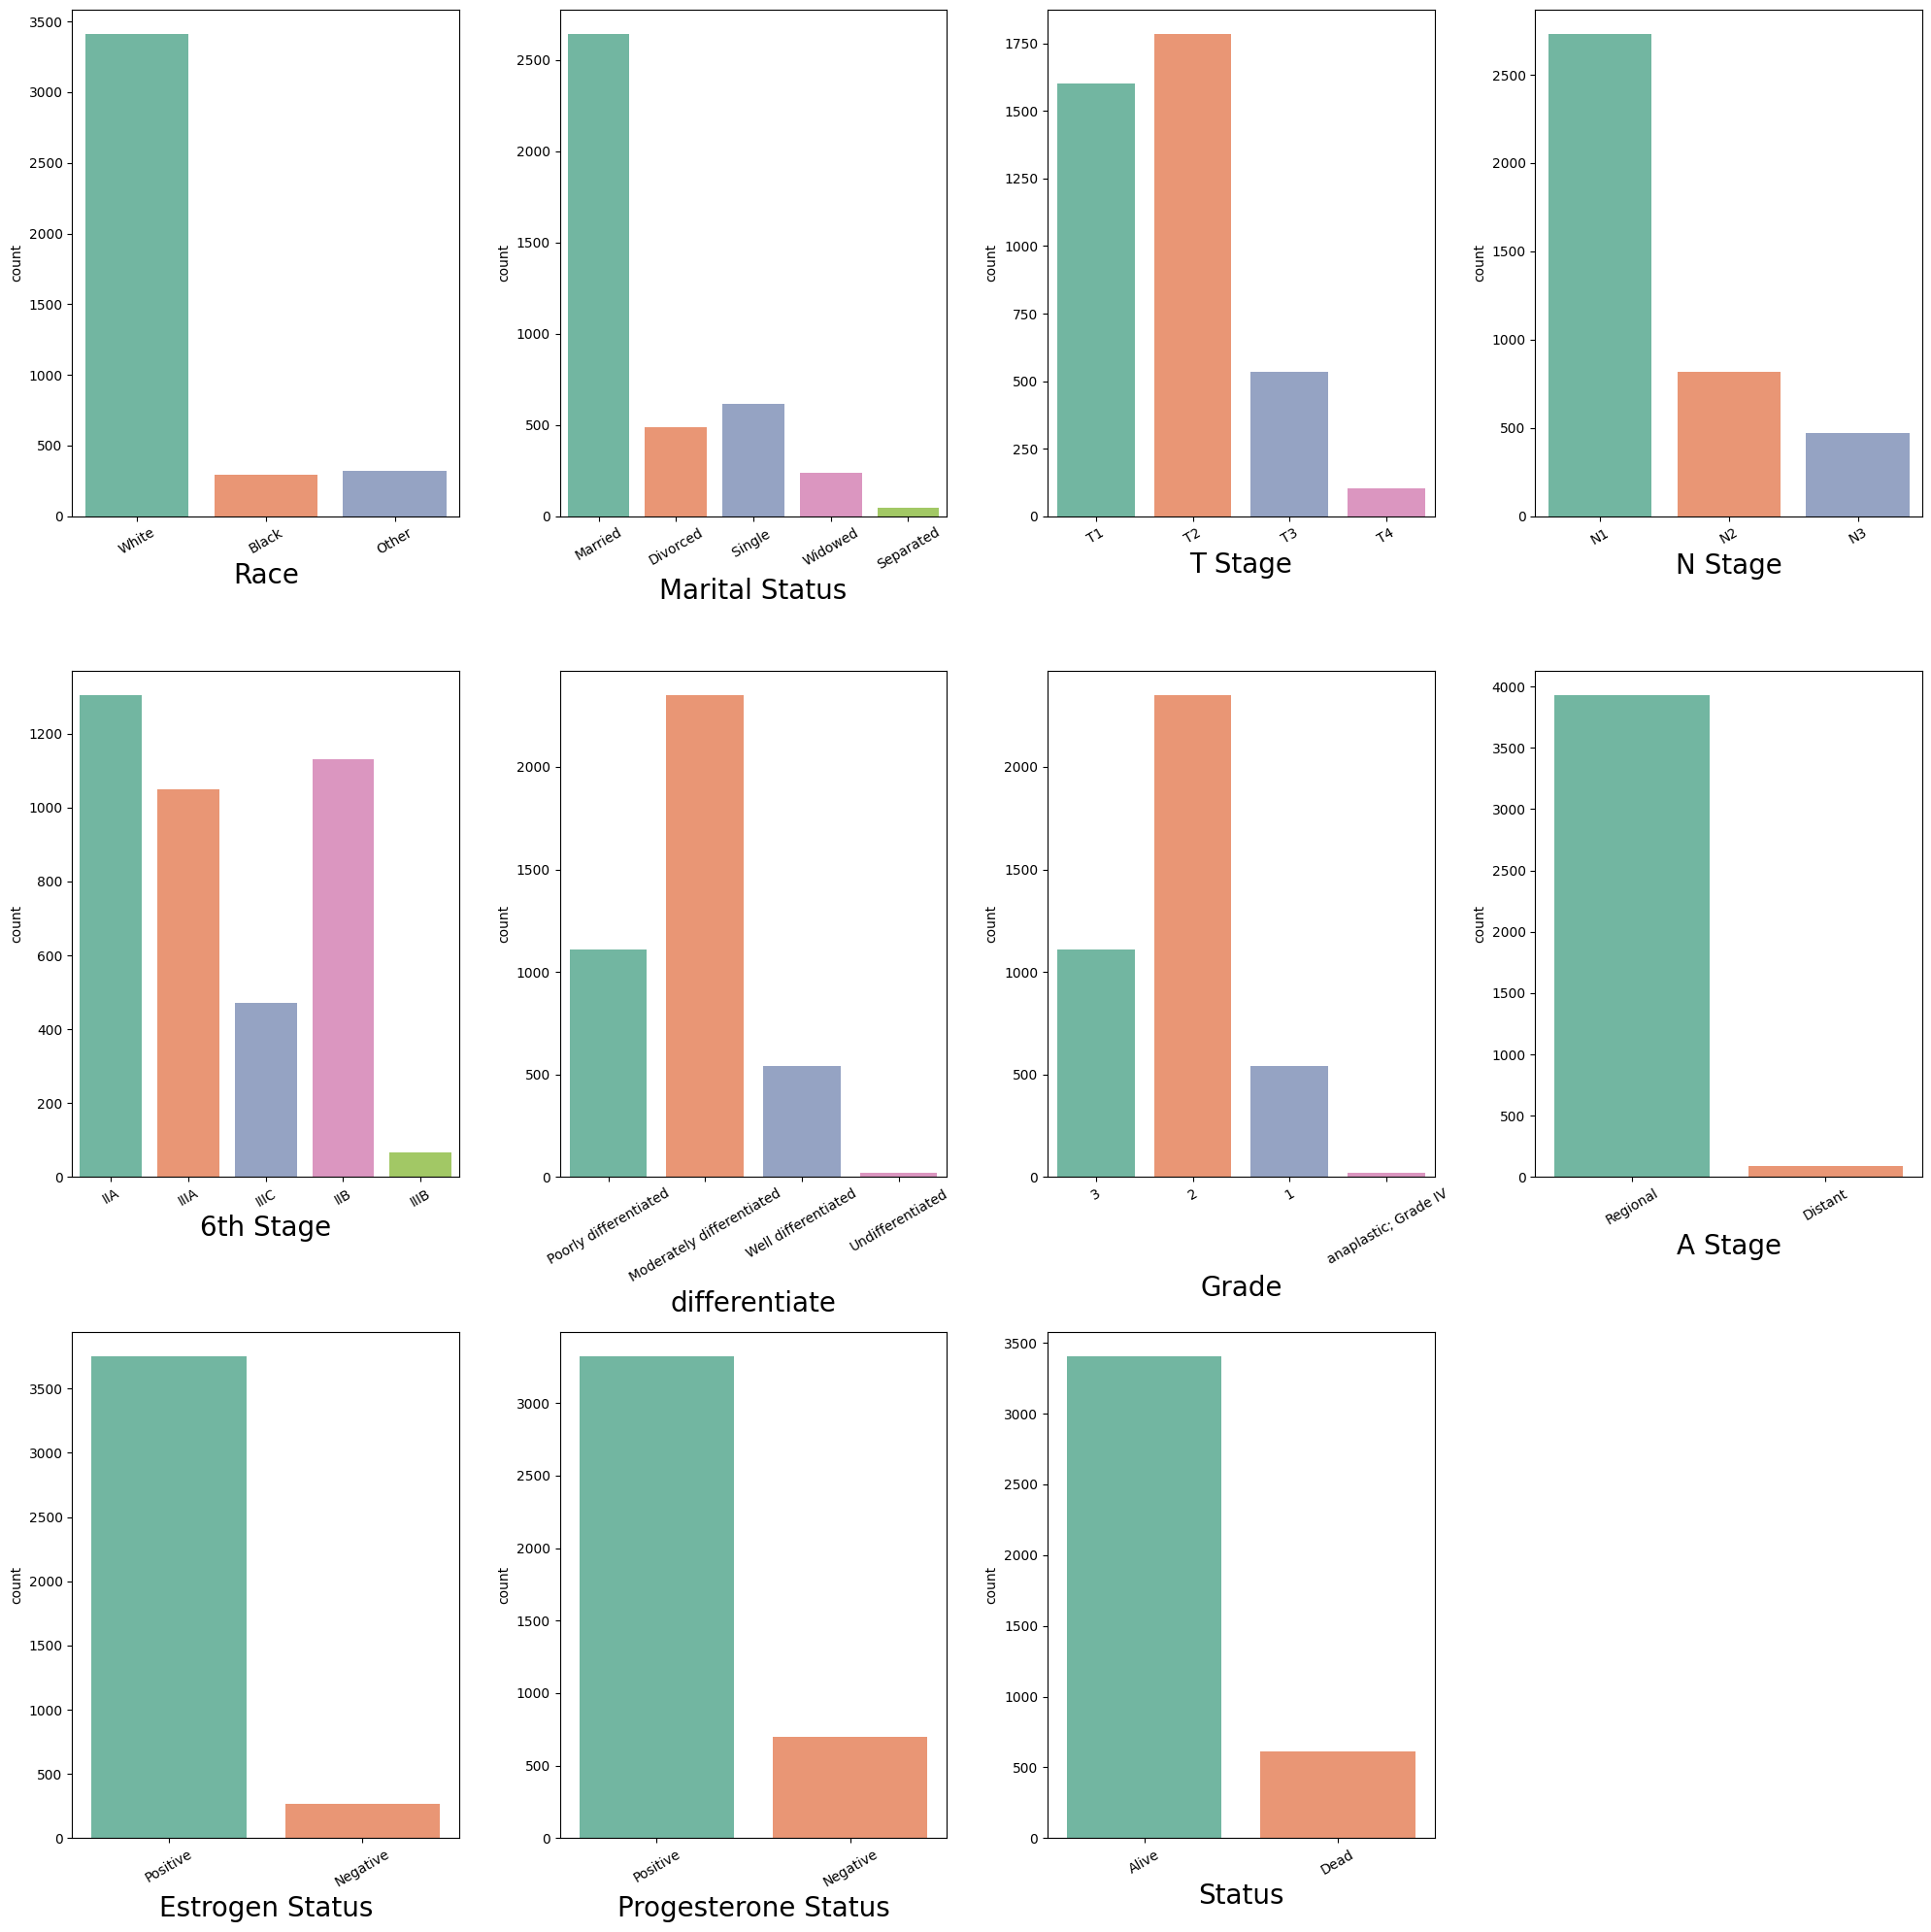

In [15]:
# sns.set_color_codes(palette='dark')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Race','Marital Status','T Stage','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status' ]
for i in Category:
    if plotnumber <=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.countplot(x = df[i], palette='Set2')
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

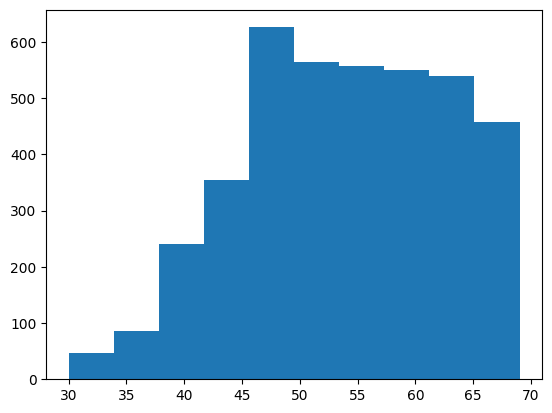

In [16]:
plt.hist(x = df['Age'],bins=10)
plt.show()

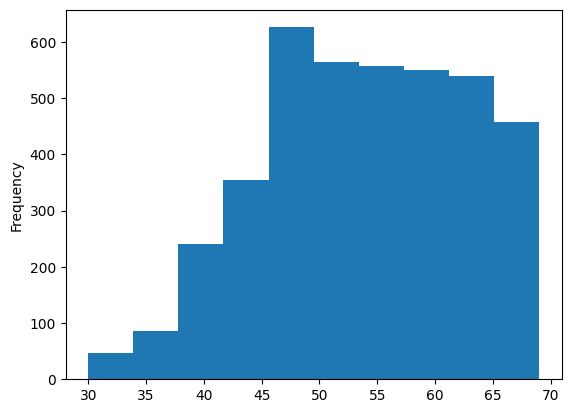

In [17]:
df['Age'].plot(kind='hist')
plt.show()

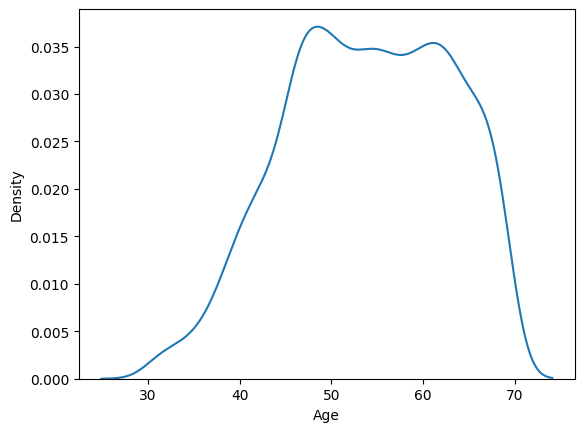

In [18]:
sns.distplot(df['Age'],hist=False)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [20]:
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status','Status']
df=ordinal_encode(df, oe_col)
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

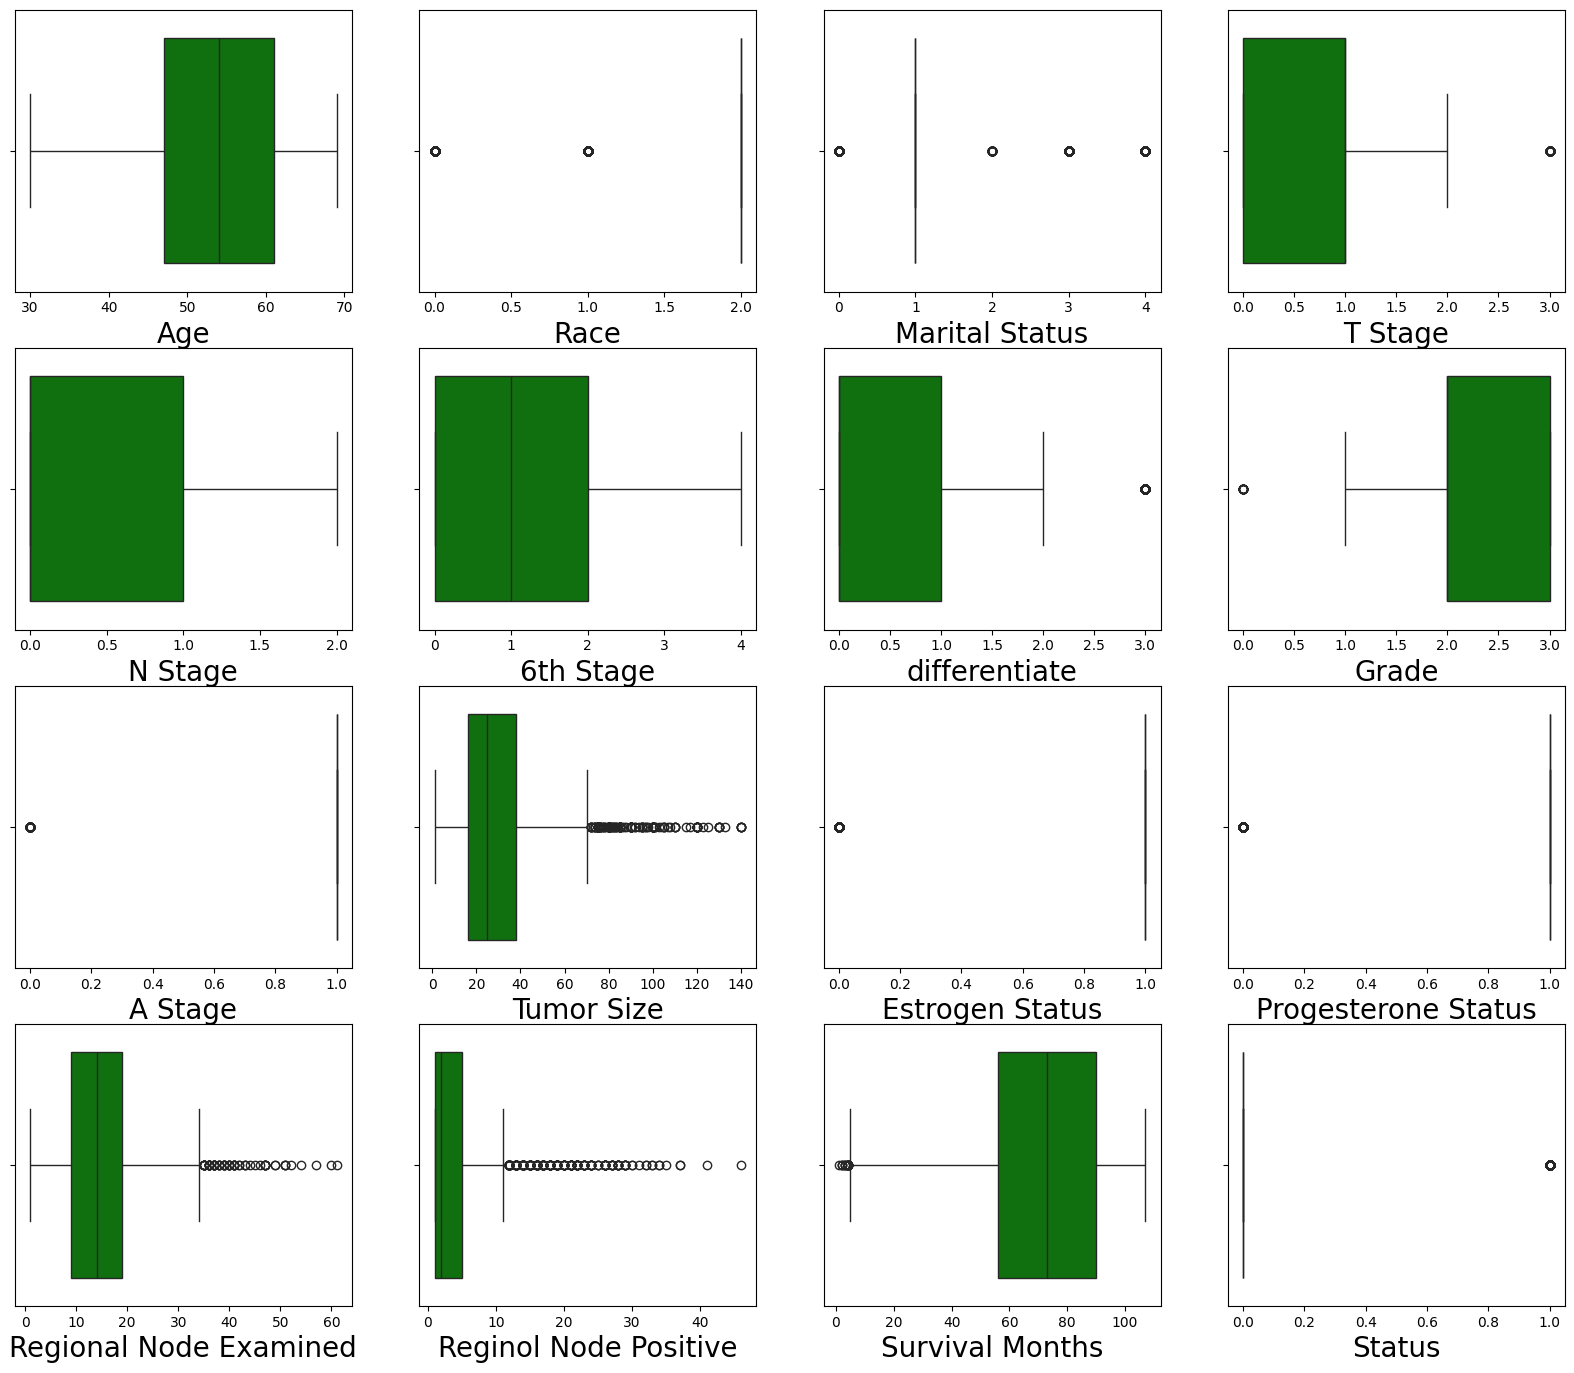

In [21]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(x = df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (4024, 16)
Shape of the dataframe after removing outliers:  (3254, 16)
Percentage of data loss post outlier removal:  19.135188866799204


In [23]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((4024-3254)/4024)*100,'%')

Percentage Data Loss : 19.135188866799204 %


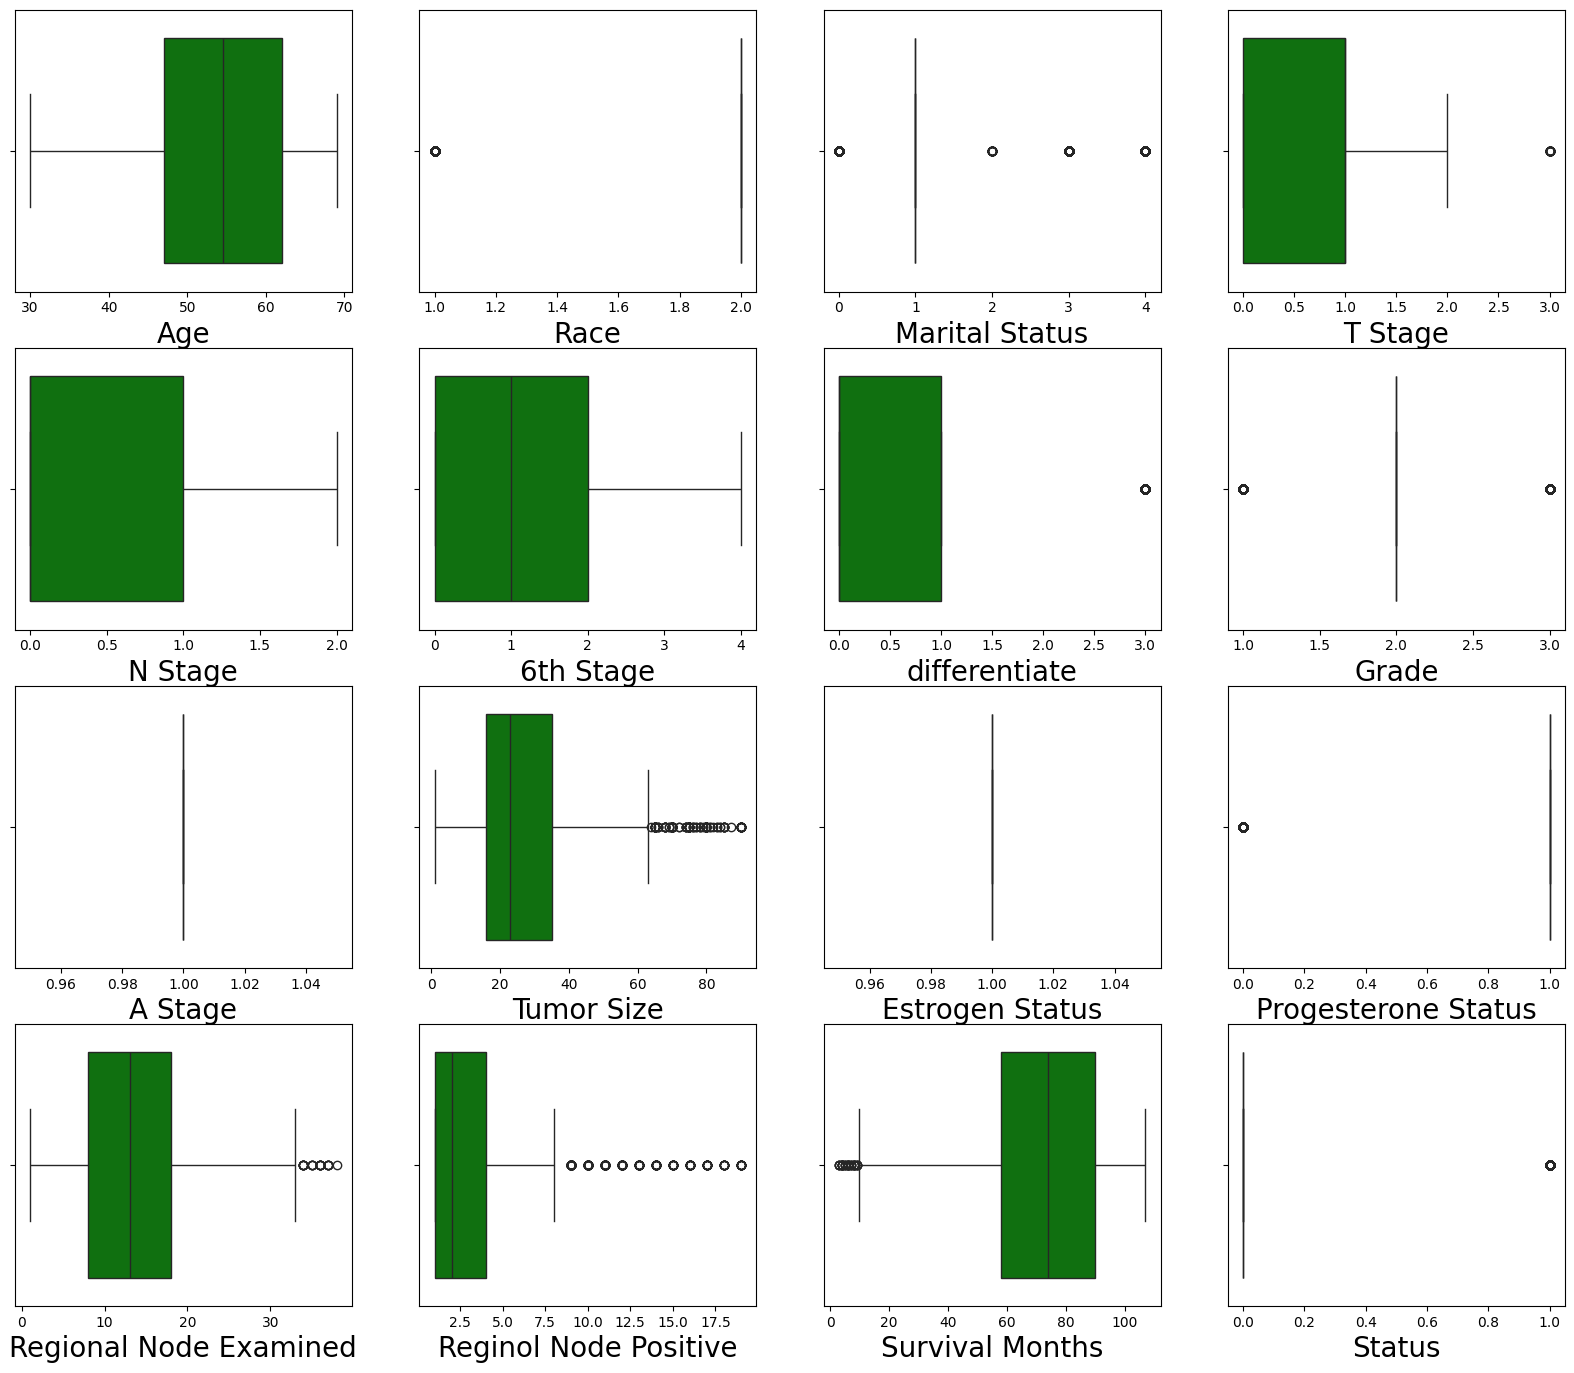

In [24]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(x = df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [25]:
df['Age'].min()

np.int64(30)

In [26]:
df['Age'].max()

np.int64(69)

In [27]:
df['Age'].mean()

np.float64(54.18653964351567)

In [28]:
df['Age'].skew()

np.float64(-0.24298010179283094)

In [29]:
df.skew()

Age                      -0.242980
Race                     -2.967586
Marital Status            1.265649
T Stage                   0.666688
N Stage                   1.575277
6th Stage                 0.939731
differentiate             1.443922
Grade                    -0.048811
A Stage                   0.000000
Tumor Size                1.314512
Estrogen Status           0.000000
Progesterone Status      -2.350973
Regional Node Examined    0.406016
Reginol Node Positive     2.177082
Survival Months          -0.564824
Status                    2.406292
dtype: float64

In [30]:
# X = df1.drop(['Status'], axis =1)
# Y = df1['Status']

In [31]:
# from sklearn.preprocessing import power_transform
# df = power_transform(X)
# df = pd.DataFrame(df, columns=X.columns)
# df.skew()

skewness of the =  -2.967586269157633
skewness of the =  1.2656488859901387
skewness of the =  0.6666883043297513
skewness of the =  1.5752769984739359
skewness of the =  0.9397310583363431
skewness of the =  1.443921692981522
skewness of the =  -0.0488110944445066
skewness of the =  -2.3509728580589866
skewness of the =  2.406291611671751


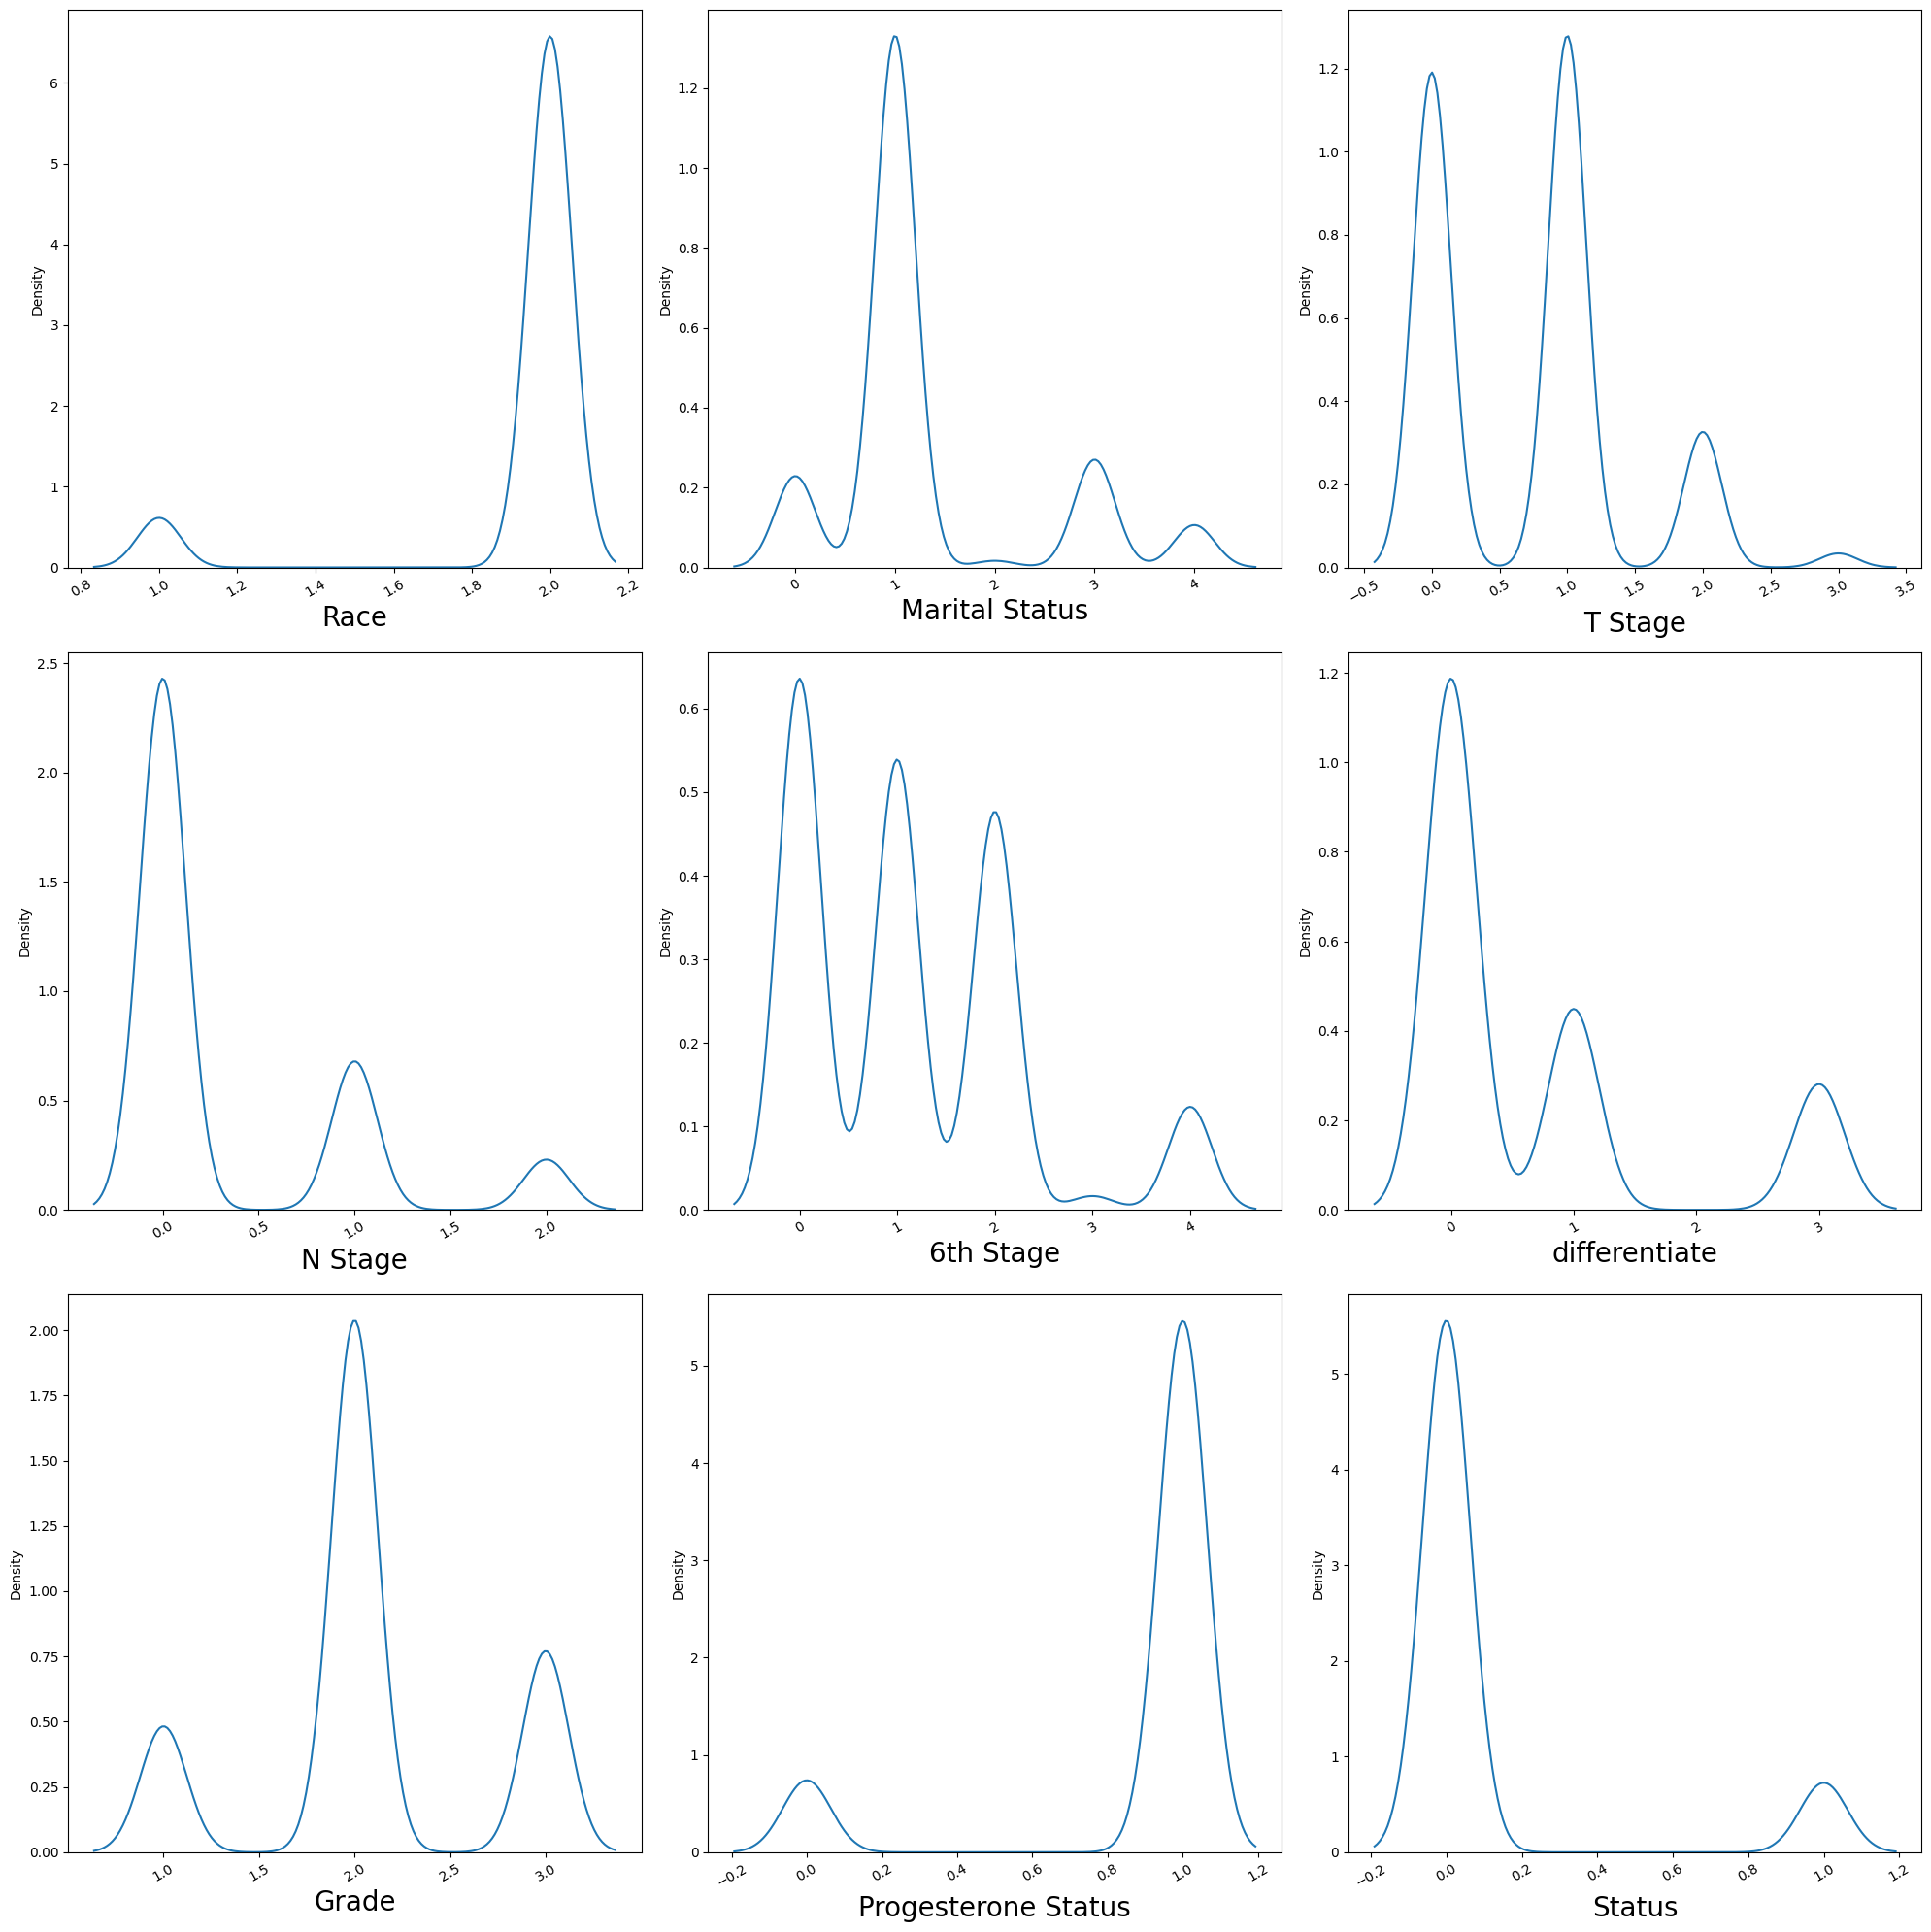

In [32]:
# sns.set_color_codes(palette='dark')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
Category=['Race','Marital Status','T Stage','N Stage','6th Stage','differentiate','Grade','Progesterone Status','Status']
for i in Category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.kdeplot(x = df[i], palette='Set2')
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
        print("skewness of the = ", df[i].skew())
    plotnumber+=1
plt.tight_layout()
plt.show()

In [33]:
df.skew()

Age                      -0.242980
Race                     -2.967586
Marital Status            1.265649
T Stage                   0.666688
N Stage                   1.575277
6th Stage                 0.939731
differentiate             1.443922
Grade                    -0.048811
A Stage                   0.000000
Tumor Size                1.314512
Estrogen Status           0.000000
Progesterone Status      -2.350973
Regional Node Examined    0.406016
Reginol Node Positive     2.177082
Survival Months          -0.564824
Status                    2.406292
dtype: float64

In [34]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

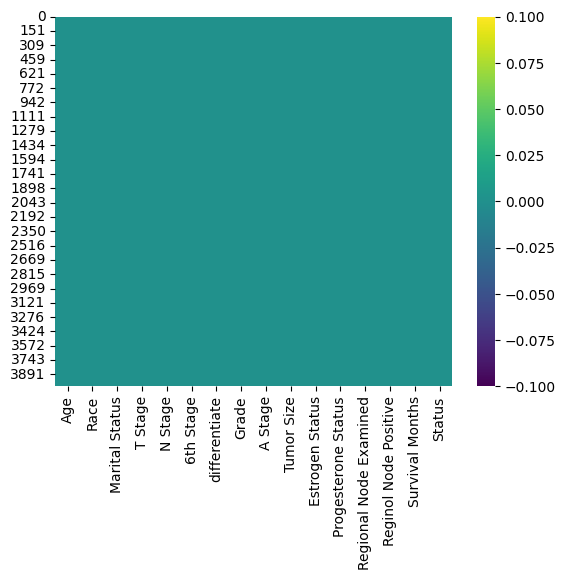

In [35]:
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.show()

<Axes: >

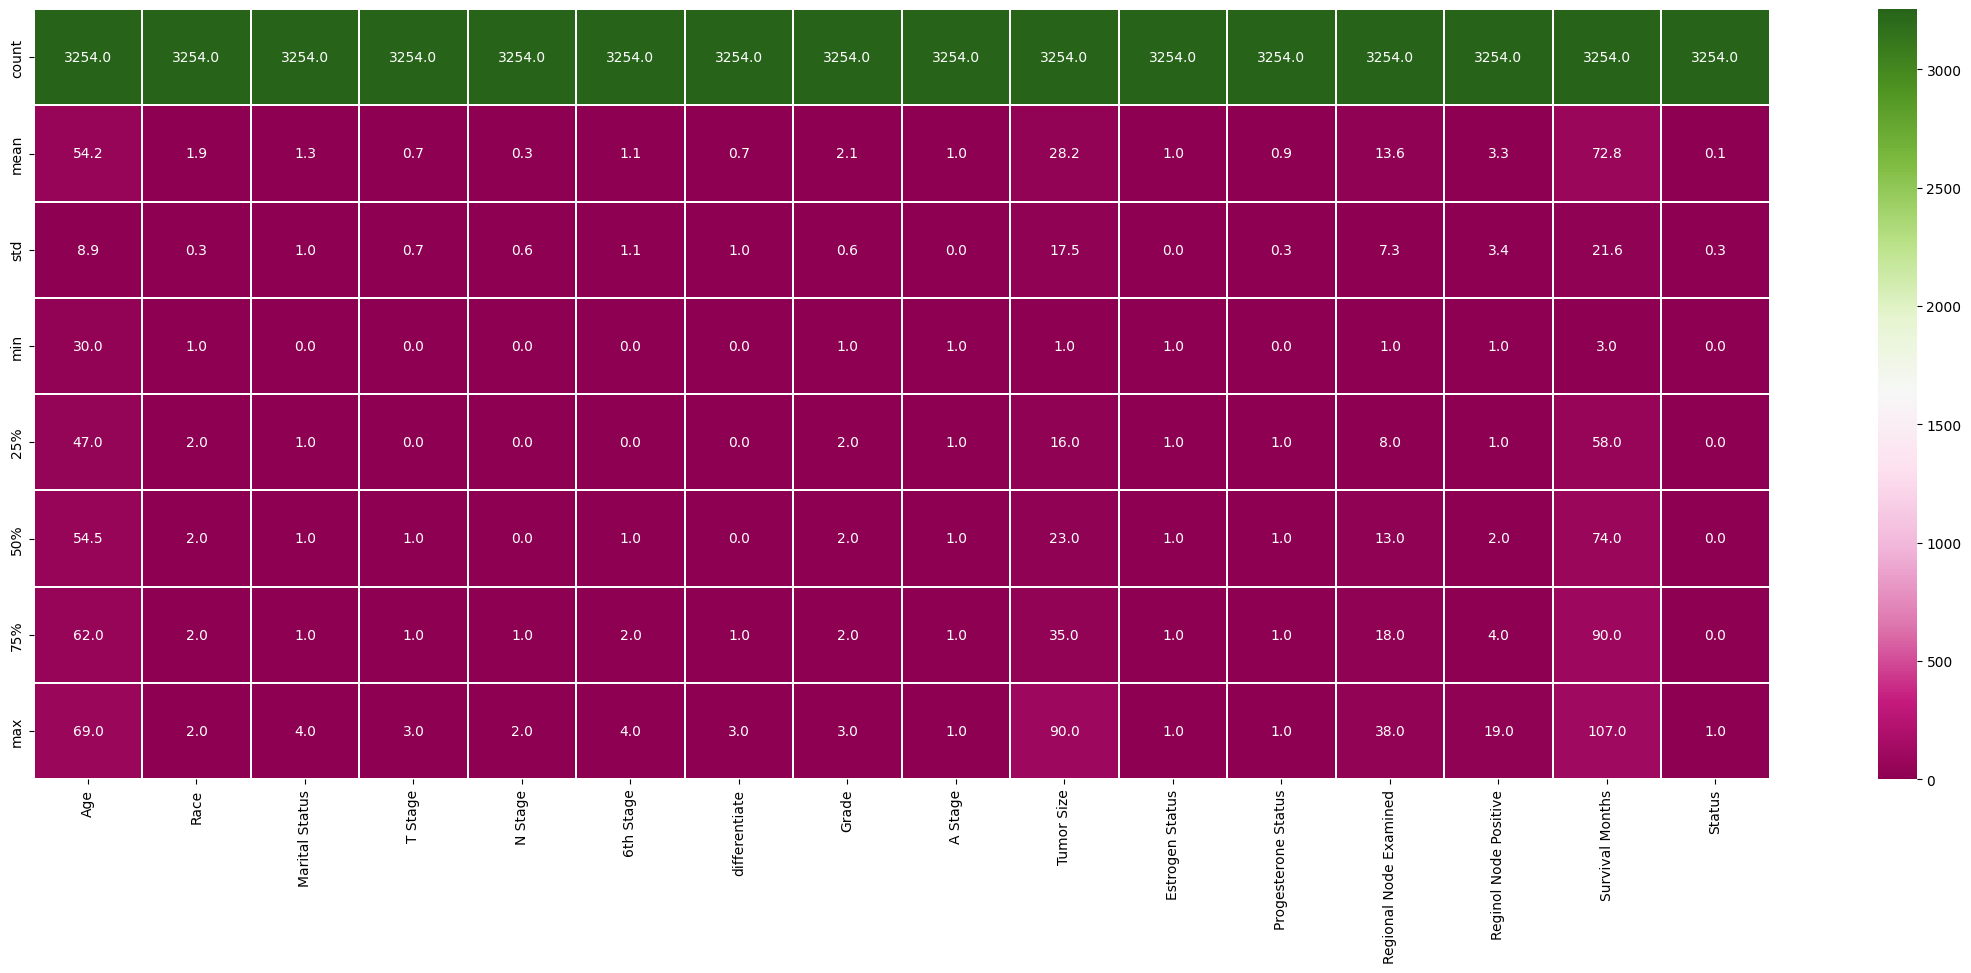

In [36]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

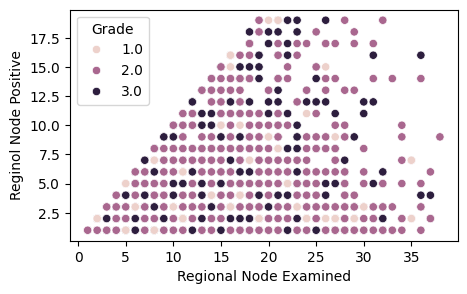

In [37]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x=df['Regional Node Examined'],y=df['Reginol Node Positive'],hue=df['Grade'] ) #,scatter = True)
plt.show()

In [38]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

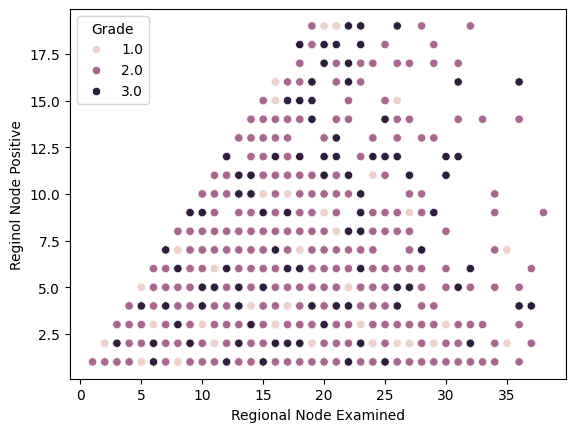

In [39]:
sns.scatterplot(x=df['Regional Node Examined'],y=df['Reginol Node Positive'],hue=df['Grade'])
plt.show()

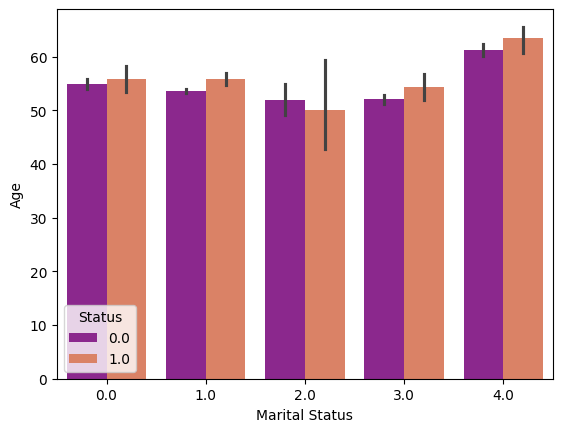

In [40]:
sns.barplot(x=df['Marital Status'],y=df['Age'],hue=df['Status'],palette='plasma')
plt.show()

In [41]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

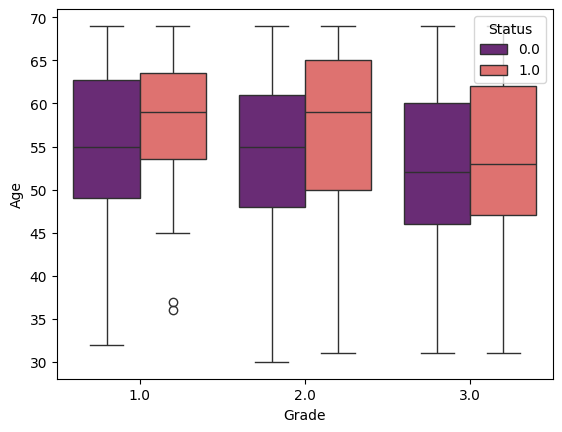

In [42]:
sns.boxplot(x=df['Grade'],y=df['Age'],hue=df['Status'], palette='magma')
plt.show()

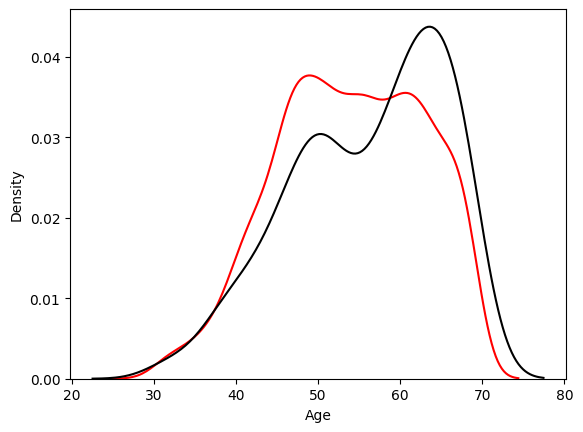

In [43]:
sns.distplot(df[df['Status']==0]['Age'],hist=False, color='red') # it`s show that red distplot is died
sns.distplot(df[df['Status']==1]['Age'],hist=False, color='black') # it`s show that black distplot is alive
plt.show()

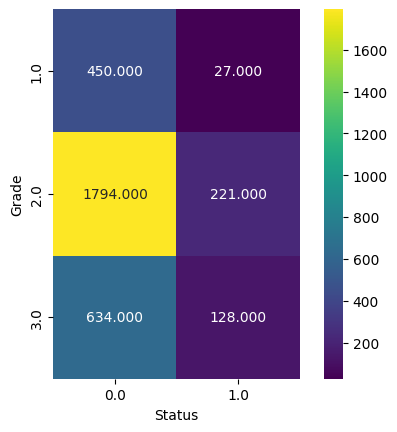

In [44]:
sns.heatmap(pd.crosstab(df['Grade'],df['Status']),cmap='viridis',annot=True, square=True, fmt='0.3f')
plt.show()

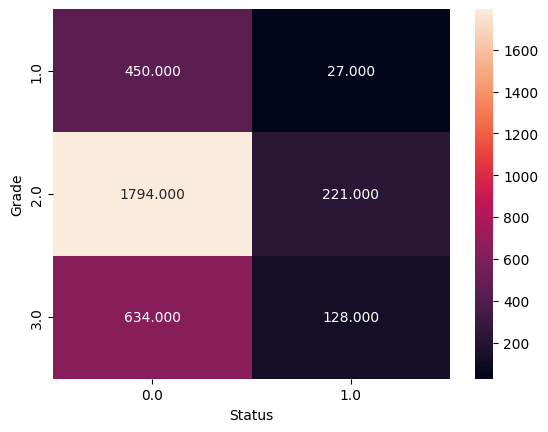

In [45]:
sns.heatmap(pd.crosstab(df['Grade'],df['Status']),annot=True, fmt='0.3f')
plt.show()

In [46]:
print(df.dtypes)

Age                         int64
Race                      float64
Marital Status            float64
T Stage                   float64
N Stage                   float64
6th Stage                 float64
differentiate             float64
Grade                     float64
A Stage                   float64
Tumor Size                  int64
Estrogen Status           float64
Progesterone Status       float64
Regional Node Examined      int64
Reginol Node Positive       int64
Survival Months             int64
Status                    float64
dtype: object


In [47]:
print(df['Status'].unique())

[0. 1.]


In [48]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

In [49]:
df.groupby('Race')['Reginol Node Positive'].mean()*100

Race
1.0    365.107914
2.0    325.672043
Name: Reginol Node Positive, dtype: float64

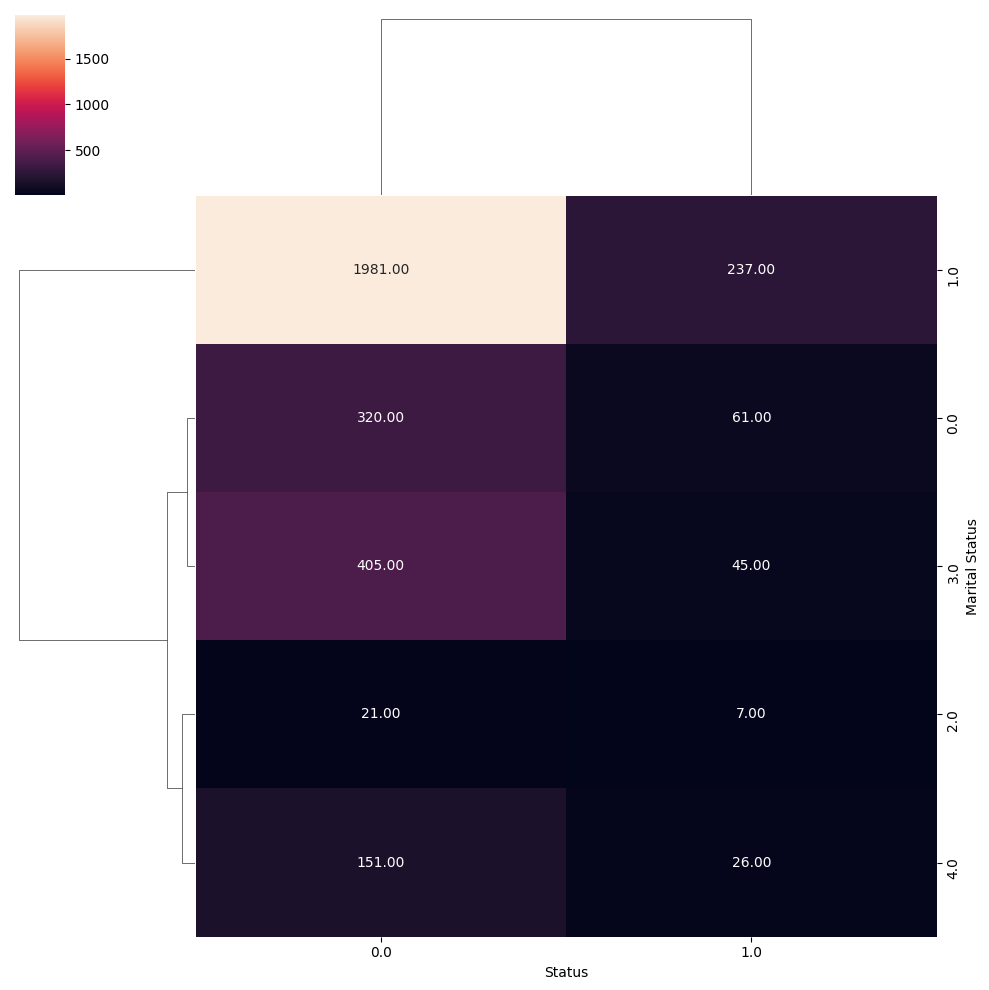

In [50]:
sns.clustermap(pd.crosstab(df['Marital Status'],df['Status']),annot=True, fmt='0.2f')
plt.show()

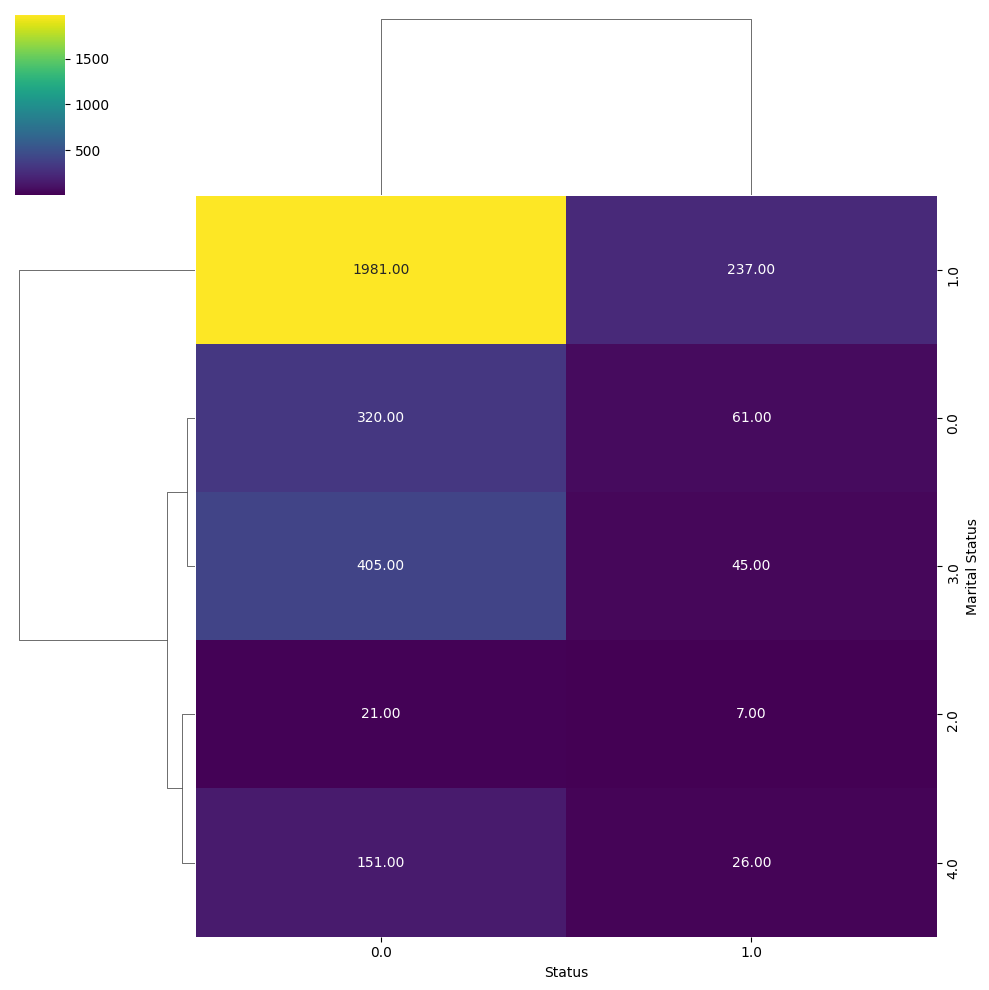

In [51]:
sns.clustermap(pd.crosstab(df['Marital Status'],df['Status']),cmap='viridis',annot=True, fmt='0.2f')
plt.show()

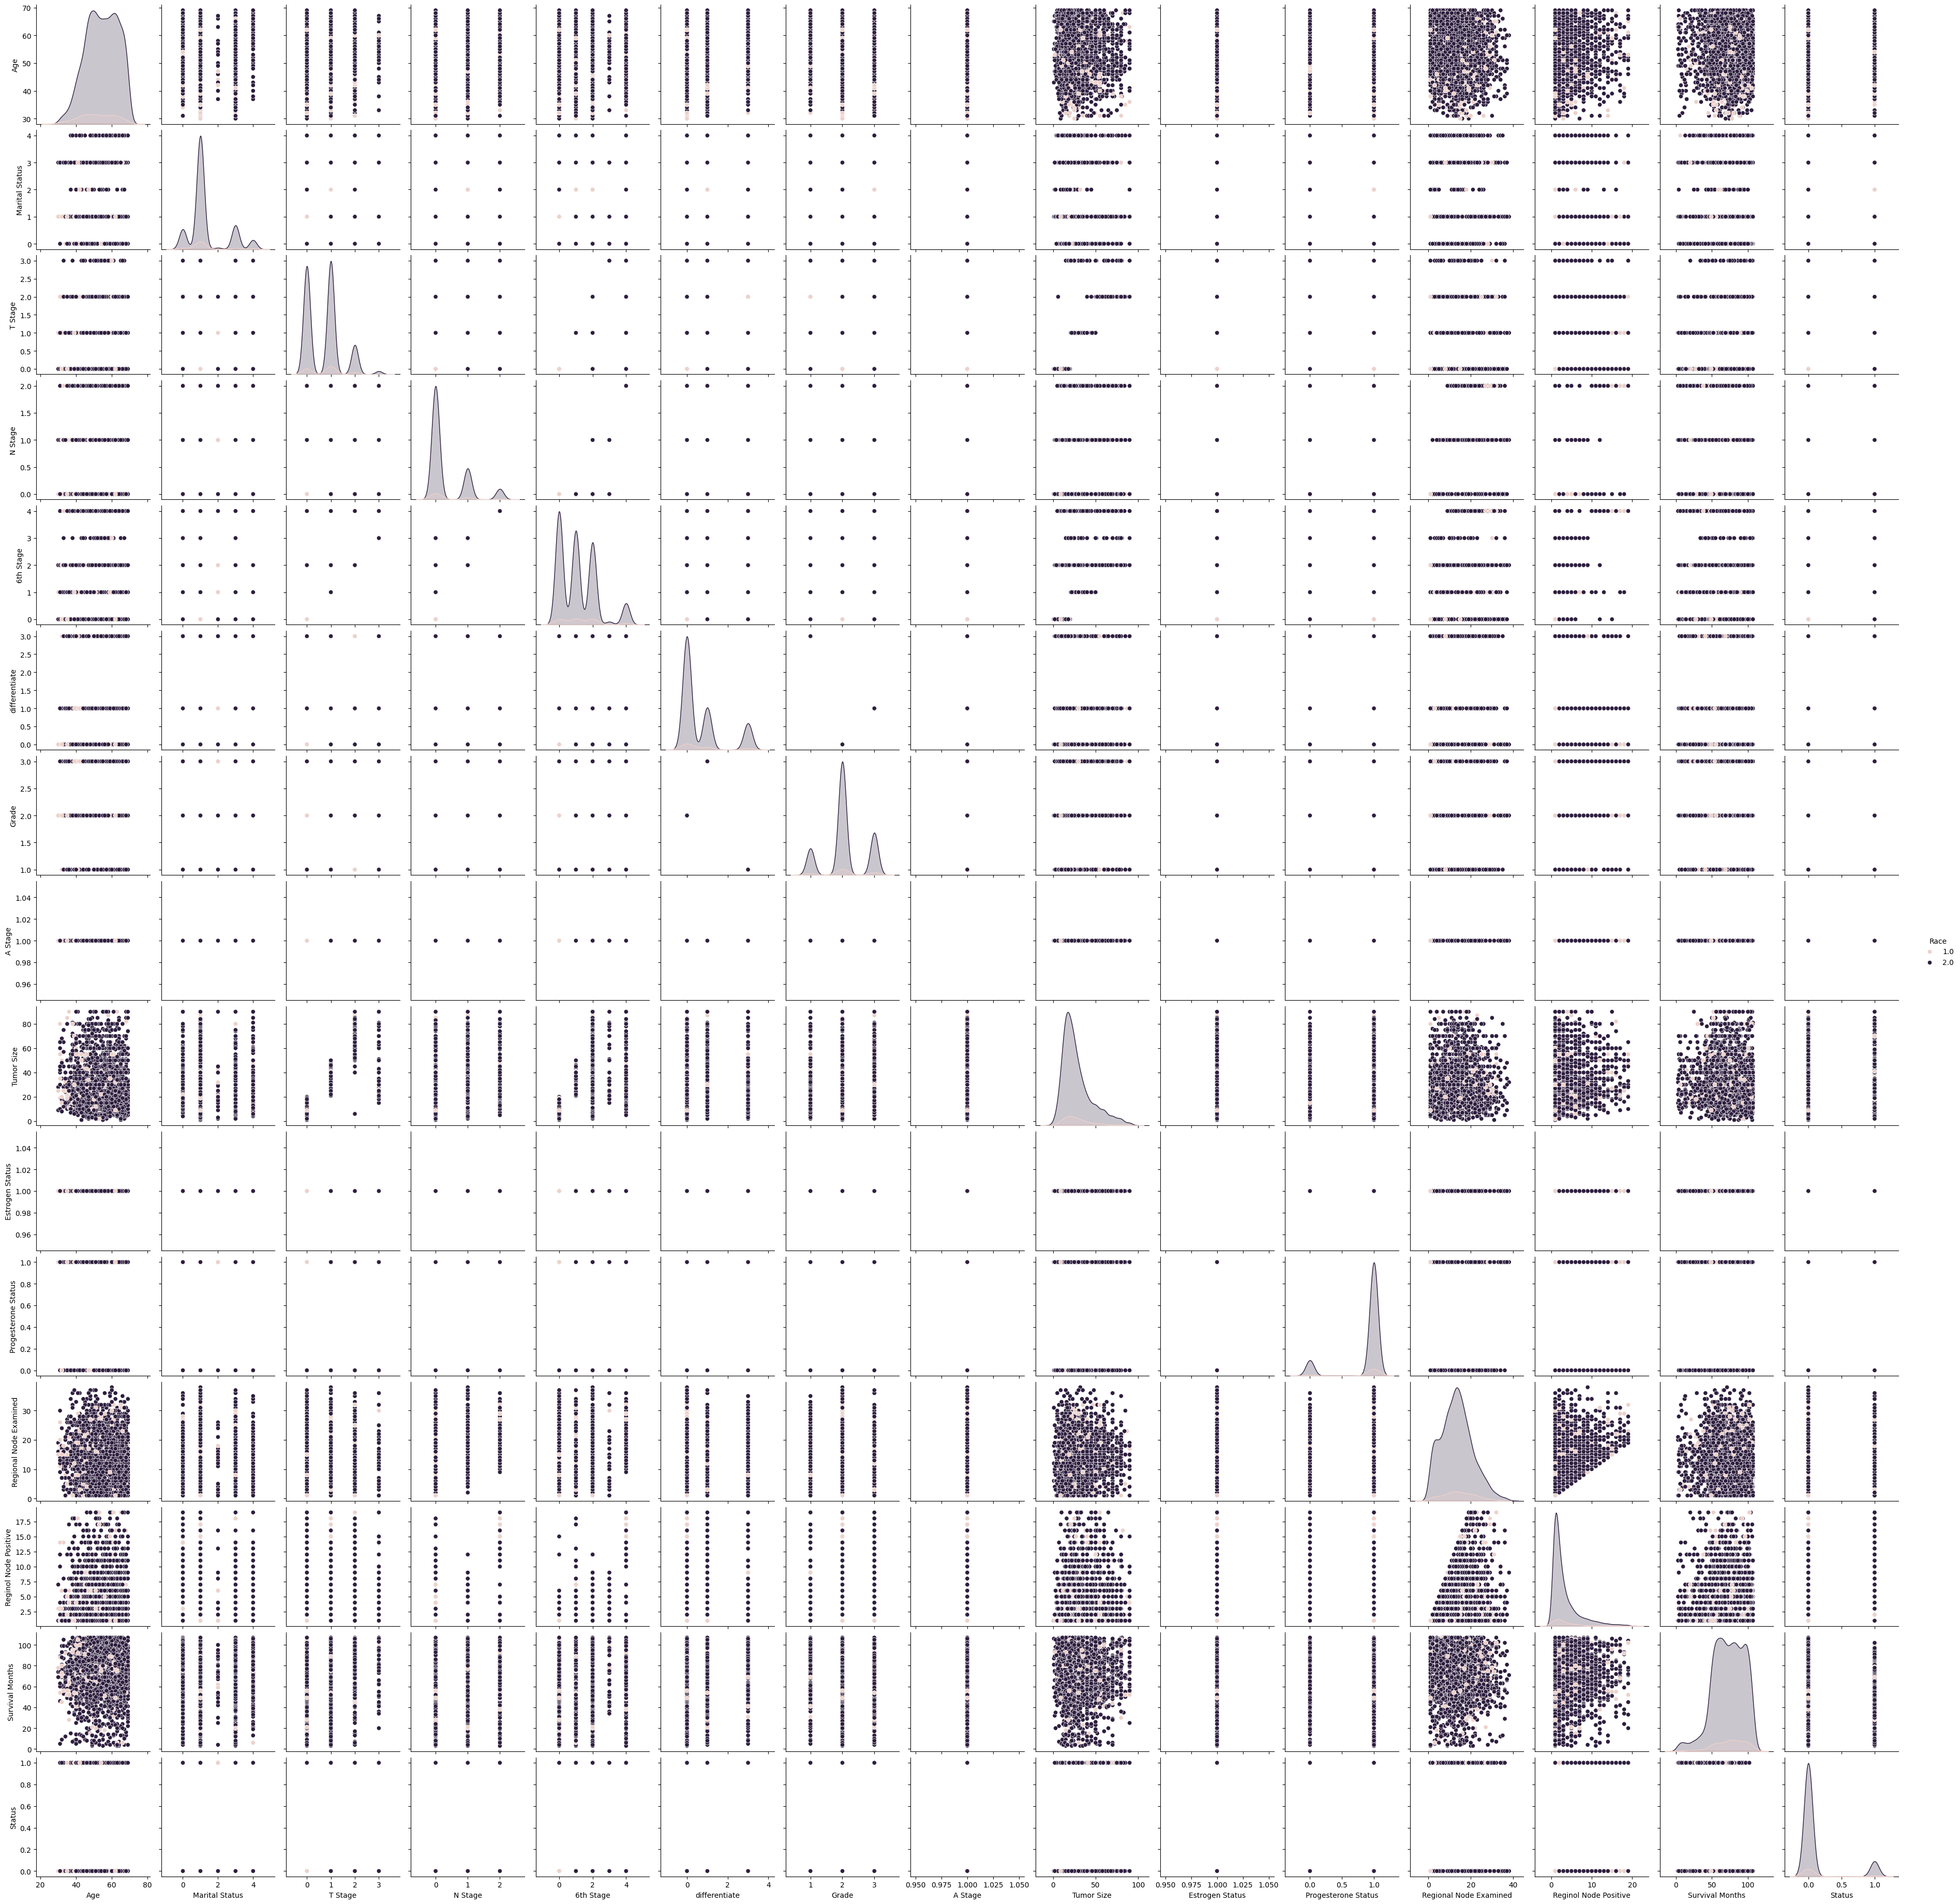

In [52]:
sns.pairplot(df,hue='Race')
plt.show() 

In [53]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

In [54]:
new = df.groupby('Grade').value_counts().reset_index()

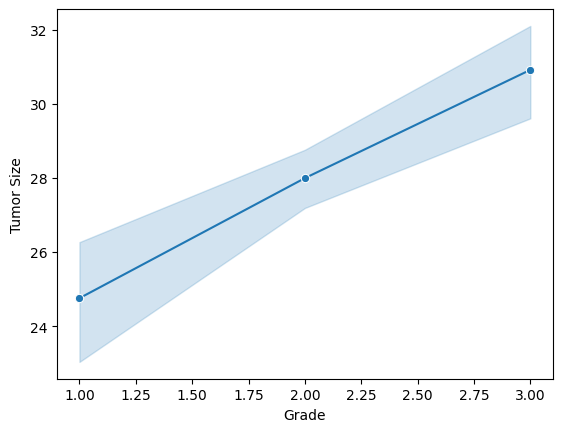

In [55]:
sns.lineplot(x = new['Grade'],y = new['Tumor Size'],marker='o')
plt.show()

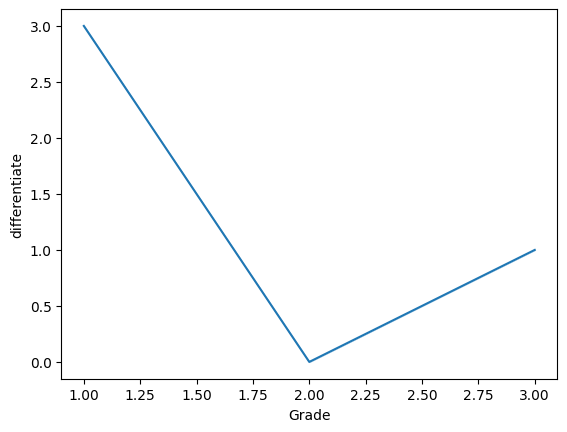

In [56]:
sns.lineplot(y=new['differentiate'],x=new['Grade'])
plt.show()

In [57]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

In [58]:
df1=df.drop(['Age','Race','Marital Status','T Stage','differentiate','N Stage','6th Stage','A Stage','Tumor Size','Estrogen Status','Progesterone Status','Regional Node Examined','Status'],axis=1)

In [59]:
df1.head()

Grade  Reginol Node Positive  Survival Months
0    3.0                      1               60
1    2.0                      5               62
2    2.0                      7               75
3    3.0                      1               84
4    3.0                      1               50

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Survival Months', axis=1),
                                                    df['Survival Months'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((2603, 2), (651, 2))

In [61]:
X_train.head()

Grade  Reginol Node Positive
2733    2.0                      4
1782    2.0                      1
3035    2.0                      1
1570    3.0                      1
3816    2.0                      1

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2603 entries, 2733 to 3377
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Grade                  2603 non-null   float64
 1   Reginol Node Positive  2603 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 61.0 KB


In [63]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

In [64]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [65]:
X_tr_ss = ss.transform(X_train)
X_te_ss = ss.transform(X_test)

In [66]:
X_tr_ss

array([[-0.15237244,  0.20828078],
       [-0.15237244, -0.65732038],
       [-0.15237244, -0.65732038],
       ...,
       [-0.15237244, -0.65732038],
       [-1.77788664, -0.36878666],
       [-0.15237244, -0.36878666]])

In [67]:
X_te_ss

array([[-0.15237244,  1.36241565],
       [-1.77788664, -0.08025294],
       [-0.15237244, -0.65732038],
       ...,
       [-0.15237244,  0.78534821],
       [-0.15237244, -0.65732038],
       [-0.15237244,  1.36241565]])

In [68]:
df1.describe()

Grade  Reginol Node Positive  Survival Months
count  3254.000000            3254.000000      3254.000000
mean      2.087585               3.290412        72.827904
std       0.610906               3.411007        21.558203
min       1.000000               1.000000         3.000000
25%       2.000000               1.000000        58.000000
50%       2.000000               2.000000        74.000000
75%       2.000000               4.000000        90.000000
max       3.000000              19.000000       107.000000

In [69]:
ss.mean_

array([2.09373799, 3.27814061])

In [70]:
X_train

Grade  Reginol Node Positive
2733    2.0                      4
1782    2.0                      1
3035    2.0                      1
1570    3.0                      1
3816    2.0                      1
...     ...                    ...
952     3.0                      2
1050    2.0                      1
2064    2.0                      1
3229    1.0                      2
3377    2.0                      2

[2603 rows x 2 columns]

In [71]:
X_tr_ss

array([[-0.15237244,  0.20828078],
       [-0.15237244, -0.65732038],
       [-0.15237244, -0.65732038],
       ...,
       [-0.15237244, -0.65732038],
       [-1.77788664, -0.36878666],
       [-0.15237244, -0.36878666]])

In [72]:
X_tr_ss = pd.DataFrame(X_tr_ss, columns=X_train.columns)          #converting array into table for X_train
X_tr_ss

Grade  Reginol Node Positive
0    -0.152372               0.208281
1    -0.152372              -0.657320
2    -0.152372              -0.657320
3     1.473142              -0.657320
4    -0.152372              -0.657320
...        ...                    ...
2598  1.473142              -0.368787
2599 -0.152372              -0.657320
2600 -0.152372              -0.657320
2601 -1.777887              -0.368787
2602 -0.152372              -0.368787

[2603 rows x 2 columns]

In [73]:
X_te_ss = pd.DataFrame(X_te_ss, columns=X_test.columns)      #same gose for X_test data
X_te_ss

Grade  Reginol Node Positive
0   -0.152372               1.362416
1   -1.777887              -0.080253
2   -0.152372              -0.657320
3    1.473142              -0.368787
4    1.473142              -0.657320
..        ...                    ...
646 -1.777887              -0.080253
647  1.473142               0.208281
648 -0.152372               0.785348
649 -0.152372              -0.657320
650 -0.152372               1.362416

[651 rows x 2 columns]

In [74]:
X_tr_ss.skew()

Grade                   -0.058075
Reginol Node Positive    2.196208
dtype: float64

In [75]:
np.round(X_train.describe(), 1)

Grade  Reginol Node Positive
count  2603.0                 2603.0
mean      2.1                    3.3
std       0.6                    3.5
min       1.0                    1.0
25%       2.0                    1.0
50%       2.0                    2.0
75%       2.0                    4.0
max       3.0                   19.0

In [76]:
df.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68   2.0             1.0      0.0      0.0        0.0            1.0   
1   50   2.0             1.0      1.0      1.0        2.0            0.0   
2   58   2.0             0.0      2.0      2.0        4.0            0.0   
3   58   2.0             1.0      0.0      0.0        0.0            1.0   
4   47   2.0             1.0      1.0      0.0        1.0            1.0   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0    3.0      1.0           4              1.0                  1.0   
1    2.0      1.0          35              1.0                  1.0   
2    2.0      1.0          63              1.0                  1.0   
3    3.0      1.0          18              1.0                  1.0   
4    3.0      1.0          41              1.0                  1.0   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60     0.0  
1                      14                      5               62     0.0  
2                      14                      7               75     0.0  
3                       2                      1               84     0.0  
4                       3                      1               50     0.0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3254 non-null   int64  
 1   Race                    3254 non-null   float64
 2   Marital Status          3254 non-null   float64
 3   T Stage                 3254 non-null   float64
 4   N Stage                 3254 non-null   float64
 5   6th Stage               3254 non-null   float64
 6   differentiate           3254 non-null   float64
 7   Grade                   3254 non-null   float64
 8   A Stage                 3254 non-null   float64
 9   Tumor Size              3254 non-null   int64  
 10  Estrogen Status         3254 non-null   float64
 11  Progesterone Status     3254 non-null   float64
 12  Regional Node Examined  3254 non-null   int64  
 13  Reginol Node Positive   3254 non-null   int64  
 14  Survival Months         3254 non-null   int64

In [78]:
le = LabelEncoder()

In [79]:
df["Race"] = le.fit_transform(df["Race"])
df["Marital Status"] = le.fit_transform(df["Marital Status"])
df["T Stage"] = le.fit_transform(df["T Stage"])
df["N Stage"] = le.fit_transform(df["N Stage"])
df["6th Stage"] = le.fit_transform(df["6th Stage"])
df["differentiate"] = le.fit_transform(df["differentiate"])
df["A Stage"] = le.fit_transform(df["A Stage"])
df["Estrogen Status"] = le.fit_transform(df["Estrogen Status"])
df["Progesterone Status"] = le.fit_transform(df["Progesterone Status"])
df["Status"] = le.fit_transform(df["Status"])
# df["Grade"] = le.fit_transform(df["Grade"])

In [80]:
df = df.astype(int)

In [81]:
x = df.drop('Status', axis=1)
y = df['Status']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4604, 15), (1152, 15))

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [87]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 4),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7604166666666666


Confusion matrix : 
 [[466 107]
 [169 410]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       573
           1       0.79      0.71      0.75       579

    accuracy                           0.76      1152
   macro avg       0.76      0.76      0.76      1152
weighted avg       0.76      0.76      0.76      1152



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7317708333333334


Confusion matrix : 
 [[440 133]
 [176 403]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       573
           1       0.75      0.70      0.72       579

    accuracy                           0.73      1152
   macro avg       0.73      0.73      0.73      1152
weighted avg       0.73      0.73      0.73      1152




In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(x, y)
print(Y_resampled.value_counts())

Status
0    2878
1    2878
Name: count, dtype: int64


In [84]:
y_test

3354     99
1675     86
2319     89
1708     60
361     102
       ... 
2673    102
559      90
2310     70
879      85
1439     93
Name: Survival Months, Length: 651, dtype: int64

In [95]:
import pickle

# Assume 'model' is your trained ML model (e.g., RandomForestClassifier, LogisticRegression, etc.)
with open("BCP.pkl", "wb") as file:
    pickle.dump(m, file)

print("✅ Model saved successfully as BCP.pkl")


✅ Model saved successfully as BCP.pkl


In [89]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train) 
sample_index = 5
sample_input = X_test.iloc[sample_index].values.reshape(1, -1)
predicted_price = rf.predict(sample_input)
actual_price = Y_test.iloc[sample_index]
print("🔹 Actual Price:", actual_price)
print("🔹 Predicted Price:", predicted_price[0])
print("🔹 Error:", abs(actual_price - predicted_price[0]))

🔹 Actual Price: 0
🔹 Predicted Price: 0
🔹 Error: 0


In [90]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

gb_clf = GradientBoostingClassifier(random_state=42)

gb_clf.fit(X_train, Y_train)

y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)[:, 1] # For ROC-AUC

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob))

Accuracy: 0.8506944444444444
Precision: 0.8666666666666667
Recall: 0.8307426597582038
F1 Score: 0.8483245149911817
ROC-AUC Score: 0.9270240861809642


In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

sample_index = 20
sample_input = X_test.iloc[sample_index].values.reshape(1, -1)
predicted_class = rf_clf.predict(sample_input)[0]  # Get single prediction
actual_class = Y_test.iloc[sample_index]

print("🔹 Actual Class:", actual_class)
print("🔹 Predicted Class:", predicted_class)

if actual_class == predicted_class:
    print("🔹 Prediction: Correct")
else:
    print("🔹 Prediction: Incorrect")

🔹 Actual Class: 1
🔹 Predicted Class: 1
🔹 Prediction: Correct
